In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataframe
df= pd.read_csv("MBA.csv")
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
# Descriptive analysis of the data frame, only works on NUMERICAL DATA
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [4]:
df.isnull().sum() #To get the total number of null values

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
df["Member_number"]= df["Member_number"].astype(str)
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [6]:
#The data column was initially object, cha\\ing it to datetime format which is the ideal format in python
df["Date"]=pd.to_datetime(df["Date"])
df

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk
...,...,...,...
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice


In [7]:
df.info() #Gives a summary of the dataframe, the count and the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


In [8]:
#Extracting the month name from the Date column because it has been changed to the ideal format-YYYY-MM-DD
df['month'] = df['Date'].dt.month_name()
df

,Member_number,Date,itemDescription,month
0,1808,2015-07-21,tropical fruit,July
1,2552,2015-05-01,whole milk,May
2,2300,2015-09-19,pip fruit,September
3,1187,2015-12-12,other vegetables,December
4,3037,2015-01-02,whole milk,January
...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,August
38761,2022,2014-02-23,candy,February
38762,1097,2014-04-16,cake bar,April
38763,1510,2014-03-12,fruit/vegetable juice,March


In [9]:
#Extracting the year name from the Date column 
df["Year"]=df['Date'].dt.year
df

,Member_number,Date,itemDescription,month,Year
0,1808,2015-07-21,tropical fruit,July,2015
1,2552,2015-05-01,whole milk,May,2015
2,2300,2015-09-19,pip fruit,September,2015
3,1187,2015-12-12,other vegetables,December,2015
4,3037,2015-01-02,whole milk,January,2015
...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,August,2014
38761,2022,2014-02-23,candy,February,2014
38762,1097,2014-04-16,cake bar,April,2014
38763,1510,2014-03-12,fruit/vegetable juice,March,2014


Visualization to know what month items were bought more -More items were bought in August which could be as a result of a number of reasons:
a. Since September is majorly known for school resumption, it could be a way to do a back to school shopping since majority of the items are family needs. 
b. Maybe more discounts were in August 
c. Since weather patterns can impact purchasing behaviour, there probably were more events which led to more things bought

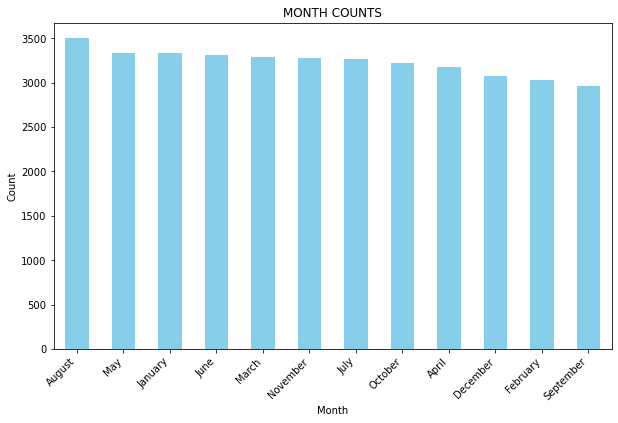

In [10]:
plt.figure(figsize=(10, 6))
df["month"].value_counts().plot(kind='bar', color='skyblue')
plt.title('MONTH COUNTS')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Visualization of items bought. 
Whole milk was purchased more, which could be a number of reasons
a. The product of whole milk could be the best in this store,plus affordability and accessibility.
b. More nursing mothers live more around such areas, since children need milk for the early stages of their lives.

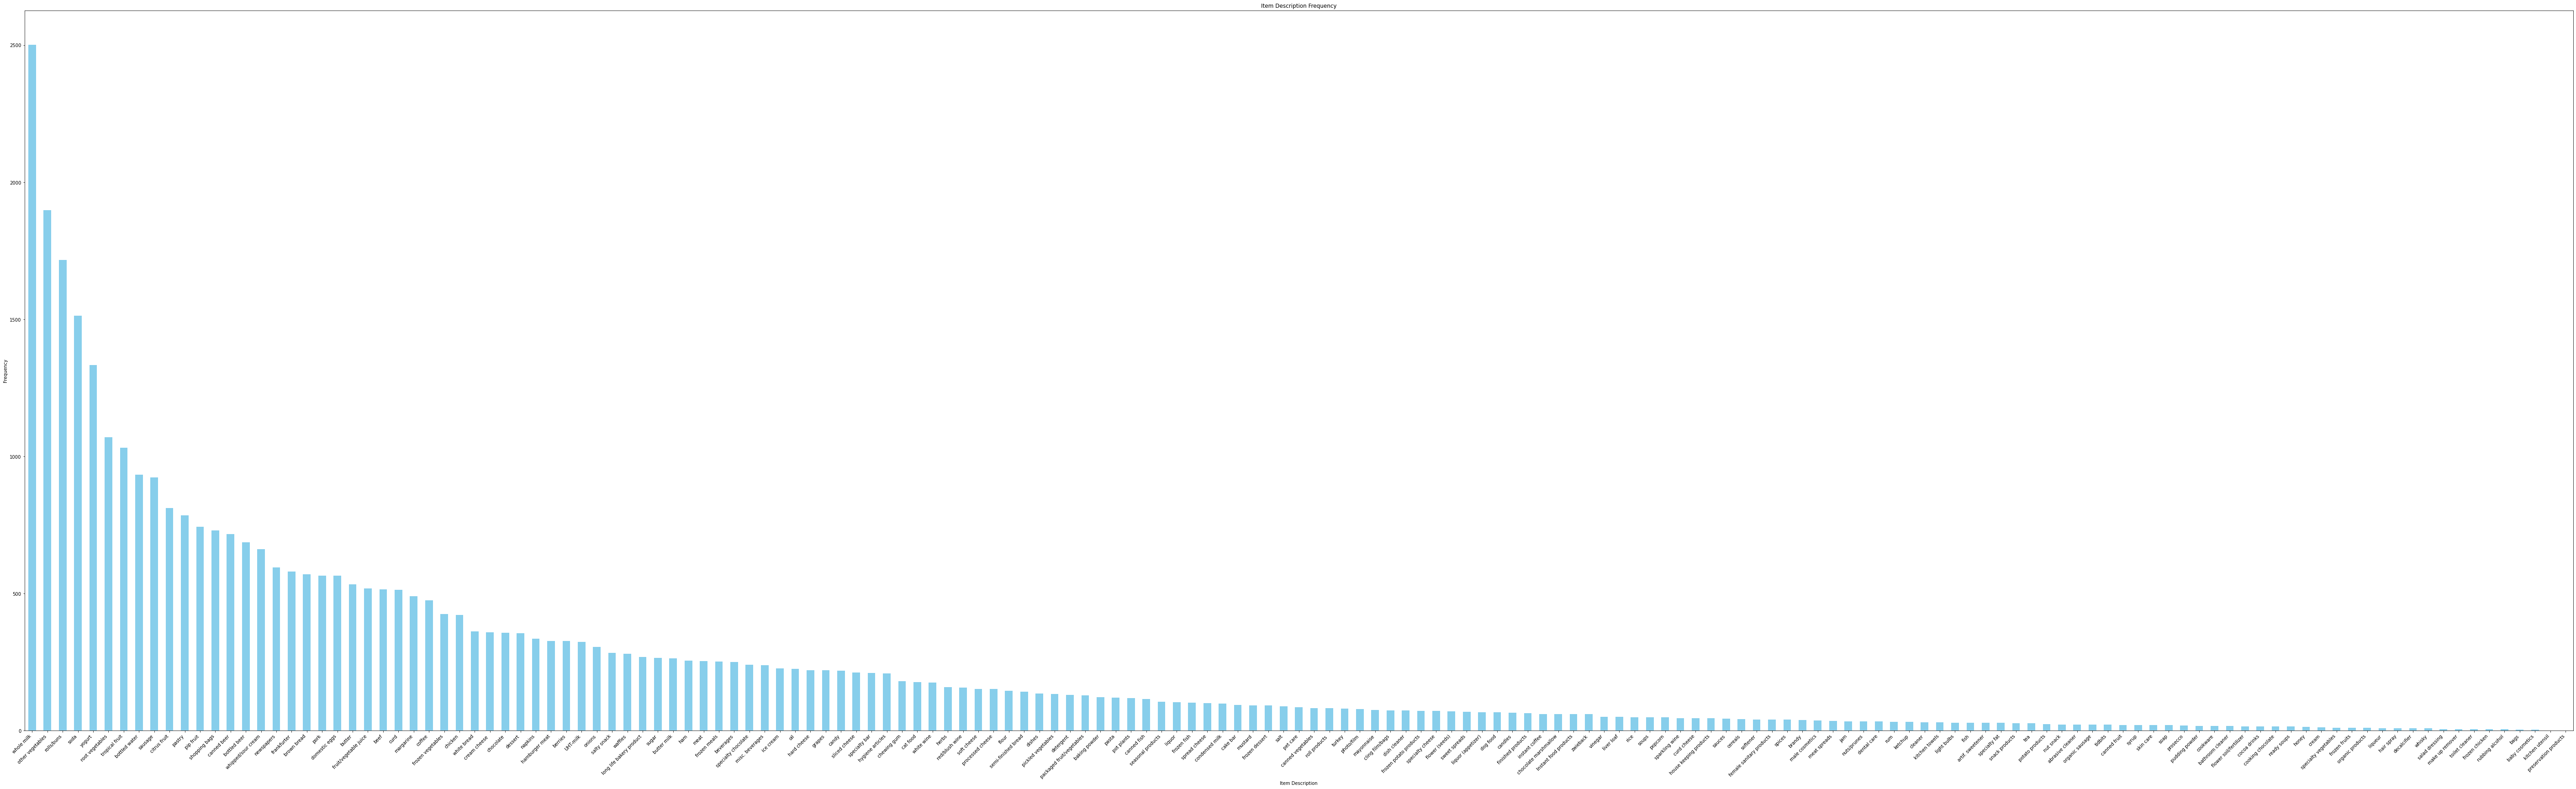

In [11]:
#ItemDescription plot
plt.figure(figsize=(100, 29))
df["itemDescription"].value_counts().plot(kind='bar', color='skyblue')
plt.title('Item Description Frequency')
plt.xlabel('Item Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The major column of concern is the item Description column which contains all the items bought.
However, since python cannot interpret categorical data(item description- different items).
The get_dummies function converts categorical data into binary columns, 0 represents the absence, 1 represents the presnece of such item
The code explains what was bought for every customer

In [12]:
items= pd.get_dummies(df["itemDescription"])
items

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Adding member_number column from df to market
items["Member_number"]= df["Member_number"]
items

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Member_number
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1808
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2552
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2300
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1187
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4471
38761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2022
38762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1097
38763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1510


#Items purchased by customers per day

In [14]:
items = items.groupby("Member_number").sum()
items

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since greater then 1, already exist, get_dummies only works with binary(1, 0). 
Hence the reason for the code below

In [15]:
items[items>= 1] = 1
items

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Importing APriori Algorithm and Association rules from mlxtend libraries
Apriori algorithm is a frequent itemset mining technique, that evaluates transcations based on associations.
Support being one of the metric is the measure of frequent itemsets , I made my min_support to be 10%-0.1 i.e give me items that have >=10% frequency

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_item = apriori(items, min_support = 0.1,use_colnames= True)
frequent_item

C:\Users\doyin\anaconda3\conda download\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.119548,(beef)
1,0.158799,(bottled beer)
2,0.213699,(bottled water)
3,0.135967,(brown bread)
4,0.126475,(butter)
5,0.165213,(canned beer)
6,0.100564,(chicken)
7,0.185480,(citrus fruit)
8,0.114931,(coffee)
9,0.120831,(curd)


#Initially had 38765 rows × 3 columns
With a support of 0.1, its now 41 rows and 3 columns.

In [17]:
rules = association_rules(frequent_item,metric ="confidence",min_threshold= 0.15)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
1,(whole milk),(bottled water),0.458184,0.213699,0.112365,0.245241,1.147597,0.014452,1.041790,0.237376
2,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197,0.157772
3,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502,0.164589
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,0.006103,1.032237,0.071601
5,(other vegetables),(soda),0.376603,0.313494,0.124166,0.329700,1.051695,0.006103,1.024178,0.078849
6,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
7,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
8,(other vegetables),(yogurt),0.376603,0.282966,0.120318,0.319482,1.129050,0.013752,1.053660,0.183350
9,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,0.013752,1.084553,0.159406


The confidence is another metric(measure of performance). Confidence is the measure of the strength of the association between items
- A higher confidence level indicates the occurrence of X(antecedents) is likely going to be followed by Y(consequents)

In [18]:
#To see association with high confidence levels
rules.sort_values(by="confidence",ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
0,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
19,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146,0.148230
12,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190,0.157955
6,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
22,(tropical fruit),(whole milk),0.233710,0.458184,0.116470,0.498353,1.087672,0.009388,1.080076,0.105189
16,(root vegetables),(whole milk),0.230631,0.458184,0.113135,0.490545,1.070630,0.007464,1.063522,0.085746
20,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971,0.071966
9,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,0.013752,1.084553,0.159406
2,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197,0.157772


In [19]:
len(rules)

26

In [20]:
rules = association_rules(frequent_item,metric ="lift",min_threshold= 0.15)

The metric-Lift shows the likelihood of Y(consequents) being purchased when X(antecedents) is purchased compared to Y being purchased without X
    - A greater than 1 lift suggests that the X(antecedent) as a positive effect on the occurrence on Y, while less than 1 indicates negative or no association

In [21]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
1,(whole milk),(bottled water),0.458184,0.213699,0.112365,0.245241,1.147597,0.014452,1.041790,0.237376
2,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197,0.157772
3,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502,0.164589
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,0.006103,1.032237,0.071601
5,(other vegetables),(soda),0.376603,0.313494,0.124166,0.329700,1.051695,0.006103,1.024178,0.078849
6,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
7,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
8,(other vegetables),(yogurt),0.376603,0.282966,0.120318,0.319482,1.129050,0.013752,1.053660,0.183350
9,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,0.013752,1.084553,0.159406


In [22]:
rules.sort_values(by="lift", ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640
24,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
1,(whole milk),(bottled water),0.458184,0.213699,0.112365,0.245241,1.147597,0.014452,1.041790,0.237376
0,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569
19,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146,0.148230
18,(whole milk),(sausage),0.458184,0.206003,0.106978,0.233483,1.133394,0.012591,1.035850,0.217222
8,(other vegetables),(yogurt),0.376603,0.282966,0.120318,0.319482,1.129050,0.013752,1.053660,0.183350
9,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,0.013752,1.084553,0.159406
14,(rolls/buns),(yogurt),0.349666,0.282966,0.111339,0.318415,1.125279,0.012396,1.052011,0.171191
15,(yogurt),(rolls/buns),0.282966,0.349666,0.111339,0.393472,1.125279,0.012396,1.072224,0.155267


Zhang's metric used to assess the relationship,helps understand how the presence or absence of item A affects the likelihood of item B being present in a transacion, with range -1(indicating a strong negative association) to 1(indicating a strong positive association)

In [23]:
rules.sort_values(by="zhangs_metric", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640
1,(whole milk),(bottled water),0.458184,0.213699,0.112365,0.245241,1.147597,0.014452,1.041790,0.237376
18,(whole milk),(sausage),0.458184,0.206003,0.106978,0.233483,1.133394,0.012591,1.035850,0.217222
24,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185,0.193926
13,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
8,(other vegetables),(yogurt),0.376603,0.282966,0.120318,0.319482,1.129050,0.013752,1.053660,0.183350
7,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
14,(rolls/buns),(yogurt),0.349666,0.282966,0.111339,0.318415,1.125279,0.012396,1.052011,0.171191
3,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502,0.164589
0,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615,0.163569


# Conclusions
1. Yogurt and Milk- Research has it that eating dairy like milk and yogurt is linked to lower risk of premature death and cardiovascular disease, this could be a reason for buying these items , since they are bought dairy products. 
1b. Recommendation:
Introducing more healthy dairy products alongside these two for more sales

2. Bottled water and whole milk- Milk are usually dissolved in water before taken, this could be a good reason for this
3. Whole Milk and Sausage- Sausage is considered as a meal for brekfast, however, it is high in fat and calorie, since the antecedent is milk
Recommendation:
-Eggs could be sold alongside sausage to increase more chances of it being bought, the combination will be balanced- Sausage+eggs+milk
- Other foods lower in fat should be sold